In [1]:
# !pip install labelme opencv-python matplotlib albumentations

### 1 Collect images using OpenCV

In [2]:
import os 
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [6]:

cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:786: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [ ]:
cap.isOpened()

In [ ]:
cap.read()

In [ ]:
import cv2
import os
import uuid

IMAGES_PATH = 'images'

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to open video source")
    exit()

for imgnum in range(number_images):
    print('Collecting images {}'.format(imgnum))
    ret, frame = cap.read()

    if not ret:
        print("Error: Unable to read frame from video source")
        continue

    imgname = os.path.join(IMAGES_PATH,f"{str(uuid.uuid1())}.jpg")
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [5]:
print(cv2.__version__)

4.9.0


### Annotate images with LabelMe

In [7]:
#!labelme

### Review dataset and build Images Loading Function

In [8]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')

[]

### lOAD images into TF Data Pipeline

In [13]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=False)

In [14]:
images.as_numpy_iterator().next()

b'data\\images\\33815d56-deca-11ee-93ec-9ddde5444cf5.jpg'

In [15]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [16]:
images = images.map(load_image)

In [17]:

images.as_numpy_iterator().next()

array([[[52, 48, 23],
        [55, 51, 26],
        [58, 52, 28],
        ...,
        [22, 19,  2],
        [24, 19,  0],
        [27, 22,  3]],

       [[51, 47, 22],
        [51, 47, 22],
        [52, 46, 22],
        ...,
        [24, 21,  4],
        [23, 18,  0],
        [21, 16,  0]],

       [[54, 48, 24],
        [54, 48, 24],
        [53, 47, 25],
        ...,
        [23, 20,  3],
        [22, 17,  0],
        [21, 16,  0]],

       ...,

       [[87, 76, 31],
        [87, 76, 31],
        [87, 76, 31],
        ...,
        [ 4,  4,  2],
        [ 3,  3,  1],
        [ 3,  3,  1]],

       [[92, 80, 38],
        [88, 76, 34],
        [85, 73, 31],
        ...,
        [ 4,  4,  2],
        [ 3,  3,  1],
        [ 3,  3,  1]],

       [[84, 72, 30],
        [84, 72, 30],
        [87, 75, 33],
        ...,
        [ 3,  3,  1],
        [ 3,  3,  1],
        [ 3,  3,  1]]], dtype=uint8)

In [18]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### View Raw Images with Matplotlib

In [19]:
image_generator = images.batch(4).as_numpy_iterator()

In [20]:
image_generator = images.batch(4).as_numpy_iterator()

NameError: name 'plot_images' is not defined

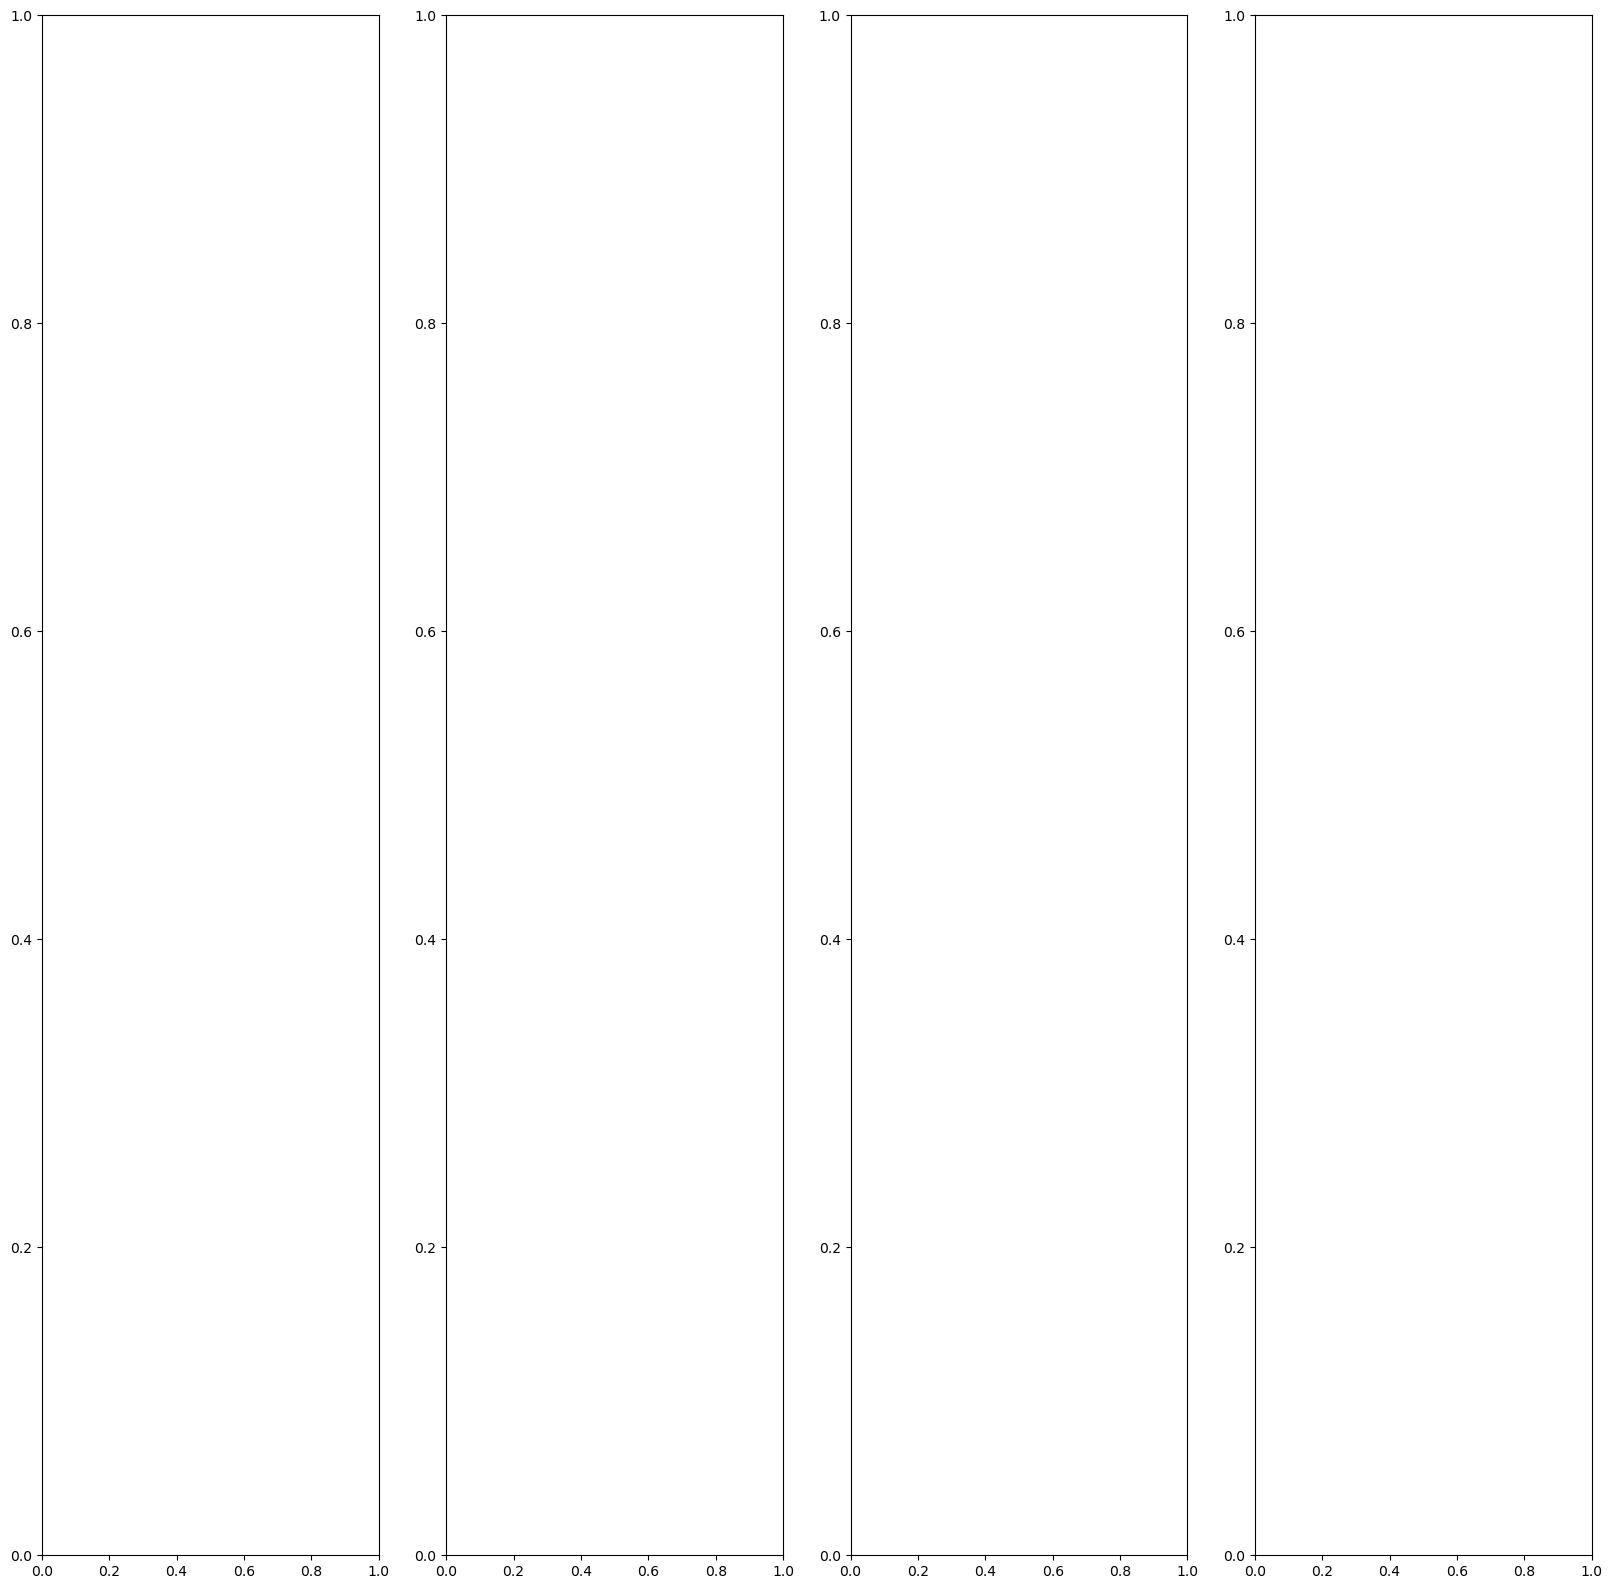

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

### Partition Unaugmented Data

In [22]:
## MANUALLY split data into train test and val

In [23]:
# 63 to train
# 14 and 13 to test and val

In [24]:
## Move the matching labels

In [25]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 

### Apply Image Augmentation on Images and Labels using Albumentations

In [26]:
# Setup Albumentations Transform Pipeline

In [27]:
import albumentations as alb

In [28]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [29]:
#  Load a Test Image and Annotation with OpenCV and JSON

In [30]:
img = cv2.imread(os.path.join('data','train', 'images','ffd85fc5-cc1a-11ec-bfb8-a0cec8d2d278.jpg'))

In [31]:

with open(os.path.join('data', 'train', 'labels', 'ffd85fc5-cc1a-11ec-bfb8-a0cec8d2d278.json'), 'r') as f:
    label = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\train\\labels\\ffd85fc5-cc1a-11ec-bfb8-a0cec8d2d278.json'

In [32]:

label['shapes'][0]['points']


NameError: name 'label' is not defined

In [33]:
#  Extract Coordinates and Rescale to Match Image Resolution

In [34]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

NameError: name 'label' is not defined

In [37]:
#raw pascal_voc format
coords

[0.0, 0.0, 0.0, 0.0]

In [35]:
#albu format
coords = list(np.divide(coords, [640,480,640,480]))

In [36]:
coords

[0.0, 0.0, 0.0, 0.0]

In [38]:
# Apply Augmentations and View Results

In [39]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

TypeError: image must be numpy array type

In [45]:
augemted.keys()

NameError: name 'augemted' is not defined

In [40]:

augmented['bboxes'][0][2:]

NameError: name 'augmented' is not defined

In [41]:
augmented['bboxes']

NameError: name 'augmented' is not defined

In [42]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

NameError: name 'augmented' is not defined

### Build and Run Augmentation Pipeline

In [43]:
#  Run Augmentation Pipeline

In [44]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):#60 albu images for single base images
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [46]:
# Load Augmented Images to Tensorflow Dataset

In [50]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x: x/255)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: aug_data\\train\\images\\*.jpg'

In [51]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: aug_data\\test\\images\\*.jpg'

In [52]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: aug_data\\val\\images\\*.jpg'

In [53]:
train_images.as_numpy_iterator().next()

NameError: name 'train_images' is not defined

In [54]:
#### Load labels to Tensorflow Dataset


In [ ]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

### Combine Label and Image Samples

In [55]:
# check partition lengths

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

In [56]:
# cREATE final datasets (images/labels)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [49]:

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[1]


In [57]:
# View Images and Annotations

In [ ]:

data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()


In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

### Build Deep Learning using the Functional API

In [ ]:
# import layers and base network

In [ ]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [58]:
# download VGG16

In [ ]:
vgg = VGG16(include_top=False)

In [ ]:
vgg.summary()

In [59]:
# bulid instance of Network


In [ ]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [60]:
# testing out Neural Network

In [61]:

facetracker = build_model()

NameError: name 'build_model' is not defined

In [62]:
facetracker.summary()

NameError: name 'facetracker' is not defined

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
X.shape

In [ ]:
classes, coords = facetracker.predict(X)

In [ ]:
classes, coords

### Define Losses and Optimizers


In [63]:
# define optimizer and LR